<a href="https://colab.research.google.com/github/HarisJafri-xcode/Python-for-Data-Science/blob/main/07-Projects/AirBnB_Data_Cleaning_and_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

The raw Air_BNB_data.csv dataset contains several data quality issues, including structural inconsistencies, missing information, irrelevant features, and statistical anomalies, which collectively compromise its utility for accurate analysis, visualization, or predictive modeling.

The objective of this project is to conduct a comprehensive and structured data cleaning and preprocessing effort to transform the raw dataset into a clean, consistent, and analysis-ready state.

# Importing Relevant Data Science Libraries

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style

# Loading Data Set inside a Data Frame

In [30]:
file_path = 'https://raw.githubusercontent.com/HarisJafri-xcode/Python-for-Data-Science/refs/heads/main/05-Datasets/Air_BNB_data.csv'

In [31]:
df = pd.read_csv(file_path)

/tmp/ipython-input-2618208116.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


# Analyzing the Data Frame

In [32]:
df.shape # Number of Rows and Columns in Data Frame

(74111, 11)

In [33]:
df.size # Number of all type of Entries in Data Frame

815221

In [34]:
df.ndim # Dimension of the Data Frame

2

In [35]:
df.columns # name of Columns in the Data Frame

Index(['id', 'room_type', 'accommodates', 'bathrooms', 'cancellation_policy',
       'cleaning_fee', 'instant_bookable', 'review_scores_rating', 'bedrooms',
       'beds', 'log_price'],
      dtype='object')

# Dropping Irrelevant Features

In [36]:
df2 = df.drop('id',axis=1) # Drop the 'id' Column , keeping axis = 1 drops it Columnwise , saving new Data Frame inside df2

In [37]:
df2.head() # Watching 1st 5 Rows of the Data Frame

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


# Removing Duplicate Rows

In [38]:
df3 = df2.copy()

In [39]:
df3.drop_duplicates(inplace=True)

In [40]:
df3.shape

(54117, 10)

Notice closely ! The Shape of the DataFrame before deleting Irrelevant Feature and Duplicate Rows was (74111,11) and after it came down to (54117,10).

In [41]:
74111-54117

19994

A Total of 19994 Rows were Duplicate in the Original Data Set.

# Treating Columns with Object Data Types

In [42]:
df4 = df3.copy()

In [43]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54117 entries, 0 to 74110
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_type             54112 non-null  object 
 1   accommodates          54114 non-null  float64
 2   bathrooms             53922 non-null  float64
 3   cancellation_policy   54109 non-null  object 
 4   cleaning_fee          54113 non-null  object 
 5   instant_bookable      54117 non-null  object 
 6   review_scores_rating  43902 non-null  float64
 7   bedrooms              54025 non-null  float64
 8   beds                  53992 non-null  float64
 9   log_price             54117 non-null  float64
dtypes: float64(6), object(4)
memory usage: 4.5+ MB


There are 4 Columns that are 'object' dtype. Other than we need to fix the Index as well. With 54117 entries, the Index Numbers start from 0 to 74110.

In [48]:
df4.reset_index(drop=True, inplace=True)

In [49]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54117 entries, 0 to 54116
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_type             54112 non-null  object 
 1   accommodates          54114 non-null  float64
 2   bathrooms             53922 non-null  float64
 3   cancellation_policy   54109 non-null  object 
 4   cleaning_fee          54113 non-null  object 
 5   instant_bookable      54117 non-null  object 
 6   review_scores_rating  43902 non-null  float64
 7   bedrooms              54025 non-null  float64
 8   beds                  53992 non-null  float64
 9   log_price             54117 non-null  float64
dtypes: float64(6), object(4)
memory usage: 4.1+ MB


What values exists inside each of the Column whose Dtype is Object.

In [55]:
for col in df4.columns:
    if df4[col].dtype == 'object':
        print(col, df4[col].unique(), end='\n \n')

room_type ['Entire home/apt' 'Private room' 'Shared room' nan]
 
cancellation_policy ['strict' 'moderate' 'flexible' nan]
 
cleaning_fee [True False nan]
 
instant_bookable ['f' 't']
 


In [61]:
for col in df4.columns:
    if df4[col].dtype == 'object':
        print(df4[col].value_counts(dropna=False), end='\n \n')

room_type
Entire home/apt    33854
Private room       18413
Shared room         1845
NaN                    5
Name: count, dtype: int64
 
cancellation_policy
strict      25213
flexible    14569
moderate    14327
NaN             8
Name: count, dtype: int64
 
cleaning_fee
True     40348
False    13765
NaN          4
Name: count, dtype: int64
 
instant_bookable
f    37838
t    16279
Name: count, dtype: int64
 


In [63]:
df5 = pd.get_dummies(df4, columns=['room_type','cancellation_policy','cleaning_fee','instant_bookable'], drop_first=False)

In [66]:
df5.shape

(54117, 16)

In [67]:
df5.columns

Index(['accommodates', 'bathrooms', 'review_scores_rating', 'bedrooms', 'beds',
       'log_price', 'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room', 'cancellation_policy_flexible',
       'cancellation_policy_moderate', 'cancellation_policy_strict',
       'cleaning_fee_False', 'cleaning_fee_True', 'instant_bookable_f',
       'instant_bookable_t'],
      dtype='object')

# Null Values

Now we certainly have got Null Values in the Numeric Columns. There are several ways to treat them. One of that would be to fill the Null Values with mean and median.

In [68]:
df_mean = df5.copy()

In [69]:
df_median = df5.copy()

In [71]:
df_mean.isnull().sum()

,0
accommodates,3
bathrooms,195
review_scores_rating,10215
bedrooms,92
beds,125
log_price,0
room_type_Entire home/apt,0
room_type_Private room,0
room_type_Shared room,0
cancellation_policy_flexible,0


Same would be the scenario with df_median

In [72]:
for col in df_mean.columns:
    if df_mean[col].dtype != 'object':
        mean = df_mean[col].mean()
        df_mean[col] = df_mean[col].fillna(mean)

In [73]:
for col in df_median.columns:
    if df_median[col].dtype != 'object':
        median = df_median[col].median()
        df_median[col] = df_median[col].fillna(median)

Instead of solving it with Mean and Median. Let us Imputate the values with a Machine Learning Algorithm.

Let us use KNN Imputation.

In [74]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_imputed = imputer.fit_transform(df5)
df_knn = pd.DataFrame(data=df_imputed, columns=df5.columns)

All three DataFrames have everything in common except for the fact that the Imputation Strategy used differs.

# Outliers Treatment

All 3 DataFrames may or may not have Outliers. We shall focus on DataFrame associated with Variable "df_knn".

Features that may have Outliers are surely not going to be Columns that were created while the Process on One Hot Encoding.

In [80]:
df_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54117 entries, 0 to 54116
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   accommodates                  54117 non-null  float64
 1   bathrooms                     54117 non-null  float64
 2   review_scores_rating          54117 non-null  float64
 3   bedrooms                      54117 non-null  float64
 4   beds                          54117 non-null  float64
 5   log_price                     54117 non-null  float64
 6   room_type_Entire home/apt     54117 non-null  float64
 7   room_type_Private room        54117 non-null  float64
 8   room_type_Shared room         54117 non-null  float64
 9   cancellation_policy_flexible  54117 non-null  float64
 10  cancellation_policy_moderate  54117 non-null  float64
 11  cancellation_policy_strict    54117 non-null  float64
 12  cleaning_fee_False            54117 non-null  float64
 13  c

In [83]:
features_with_outliers = df_knn.columns[0:6]
features_with_outliers

Index(['accommodates', 'bathrooms', 'review_scores_rating', 'bedrooms', 'beds',
       'log_price'],
      dtype='object')

How to view Outliers ?

Well Box Plot can be a good Visualization !

<Axes: >

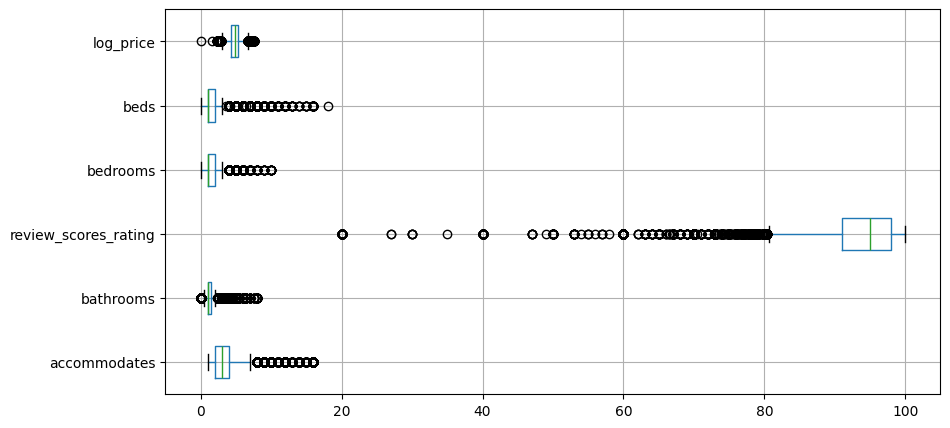

In [93]:
df_knn[features_with_outliers].boxplot(vert=False, figsize=(10,5))

Let us define a Function that can take a DataSeries as input and output the Lower Limit and Upper Limit of the DataSeries, outside of which any DataPoint shall be considered as an Outlier.

In [94]:
def remove_outliers(dataseries):
    sorted(dataseries)
    Q1,Q3 = np.percentile(dataseries,[25,75])
    IQR = Q3-Q1
    lower_range = Q1 - (1.5*IQR)
    upper_range = Q3 + (1.5*IQR)
    return lower_range, upper_range

Let us utilize this particular Function for our use.

In [95]:
df_knn_o = df_knn.copy()

In [96]:
for column in df_knn_o[features_with_outliers]:
    lr, ur = remove_outliers(df_knn_o[column])
    df_knn_o[column] = np.where(df_knn_o[column]>ur, ur, df_knn_o[column])
    df_knn_o[column] = np.where(df_knn_o[column]<lr, lr, df_knn_o[column])

<Axes: >

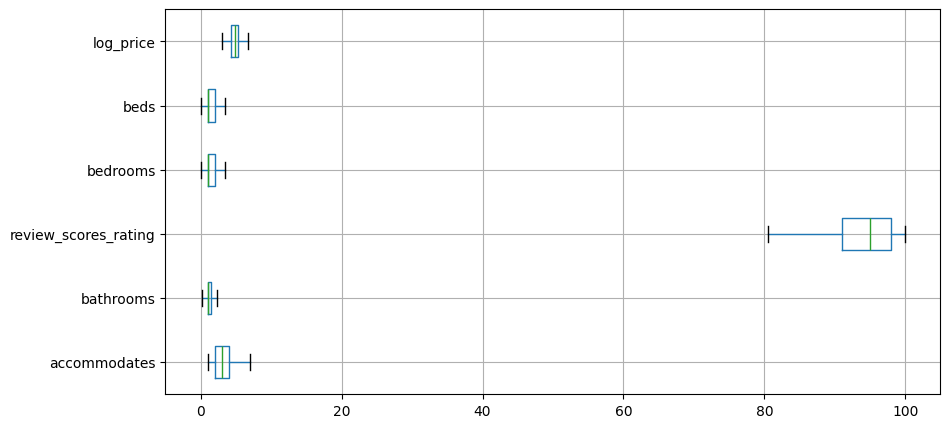

In [97]:
df_knn_o[features_with_outliers].boxplot(vert=False, figsize=(10,5))

Same approach can be applied to other Data Sets as well.

# Exporting the DataFrame to .csv File

In [98]:
# df_knn.to_csv('df_knn.csv', index=False)
# df_knn_o.to_csv('df_knn_o.csv',index=False)